# Laboratorio 3 - Parte 1

### Modelos de mezclas de funciones Gausianas y k-means

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [3]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded
/?code=4/VgCxKvoa1fa_9kXIqQ1fDD7GEBjsflX78NGaZNVAmh1pKKlpyzxlogg1Lf4IBgKfoX7BrBoiurXNnNSeRX1jgNM


#### Segundo integrante:

Deiry Sofia Navas Muriel

In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target

/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/alejandro/py3/lib/

/Users/alejandro/py3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Un vistazo a la base de datos

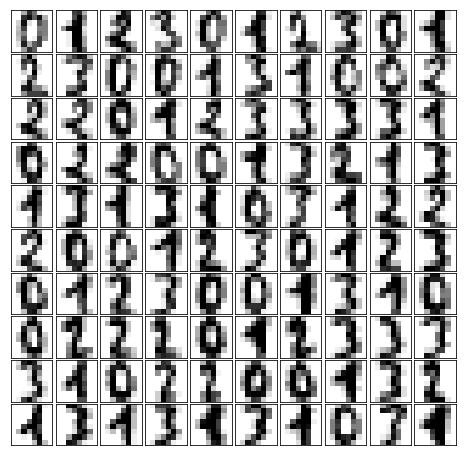

In [3]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Responda:

1.1 ¿Cuántas muestras por clase tiene la base de datos?:

In [12]:
Nclases = np.unique(Y)
for i in Nclases:
    print("clase "+ str(i) + " tiene " + str(len(X[Y==i])))

clase 0 tiene 178
clase 1 tiene 182
clase 2 tiene 177
clase 3 tiene 183


1.2 ¿Cuántas características tiene cada muestra?

In [13]:
X.shape[1]

39

1.2 Teniendo en cuenta el tipo de problema y el número de muestras por clase, ¿qué metodología de validación debería usar?¿Porqué?:

validación cruzada estratificada por que GMM es un modelo generativo y el conjunto de datos por cada clase sea igual en el entrenamiento

En la siguiente celda defina una función que tome como entradas una matriz X y una matriz Y, entrene un modelo GMM por cada clase y retorne el listado de modelos para cada clase. Adicionalmente construya una función que use los modelos entrenados en la función anterior para hacer la clasificación de un conjunto nuevo de muestras.

In [55]:
def GMMClassifierTrain(X,Y,M,tipo):
    
    #X: Matriz con las características
    #Y: Matriz con las clases
    #M: Número de componentes
    #tipo: Tipo de matriz de covarianza
    X = X
    Y = Y
    M = M
    tipo = tipo
    GMMs = []
    cov_matrix = ['spherical', 'diag', 'tied', 'full']
    Nc = len(np.unique(Y))
    for i in np.unique(Y):
        Xtrain = X[Y==i,:]
        gmm = GaussianMixture(n_components=M, covariance_type=cov_matrix[tipo]);
        gmm.fit(Xtrain)
        GMMs.append(gmm)

    return GMMs #Debe retornar un objeto que contenga todos los modelos entrenados




def GMMClassfierVal(GMMs,Xtest):
    
    Nc = len(GMMs)
    Nval = Xtest.shape[0]
    prob = np.zeros((Nval,Nc))
    for j in range(Nc):
        prob[:,j] = np.exp(GMMs[j].score_samples(Xtest))   
    Yest = np.argmax(prob,axis=1)
    
    return Yest #Debe retornar un vector con las clases predichas para cada una de las muestras en Xtest, de acuerdo con los modelos almacenados en GMMs

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un GMM. Debe consultar todo lo relacionado la creación, entrenamiento y y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [1]:
import math
import numpy as np
from numpy import random
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

# cov_index: es el indice del tipo de matriz de covarianza
#            valor por defecto es 1
#            ['spherical', 'diag', 'tied', 'full']
#            ejemplo cov_index = 1 => 'diag'
# num_components: es el numero de componentes
#            valor por defecto es 1
#            ['spherical', 'diag', 'tied', 'full']
#            ejemplo cov_index = 1 => 'diag'
def mainGMM(cov_index = 1,num_components=3,k_folds=4):
    #Validamos el modelo
    Folds = k_folds
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        gmms = GMMClassifierTrain(Xtrain,Ytrain,num_components,cov_index)



        #Validación
        Ytrain_pred = GMMClassfierVal(gmms,Xtrain);
        Yest = GMMClassfierVal(gmms,Xtest);

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1
    # redondeamos a 4 cifras decimales
    mean = round(np.mean(EficienciaTrain),5)
    std = round(np.std(EficienciaTrain),5)
    
    meanVal = round(np.mean(EficienciaVal),5)
    stdVal = round(np.std(EficienciaVal),5)
    
    return (mean, std, meanVal, stdVal)

# ['spherical', 'diag', 'tied', 'full']
mean, std, meanVal, stdVal = mainGMM(cov_index=1,num_components=3)
print('Eficiencia durante el entrenamiento = ' + str(mean) + ' +- ' + str(std))
print('Eficiencia durante la validación = ' + str(meanVal) + ' +- ' + str(stdVal))

NameError: name 'X' is not defined

## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [51]:
# ['spherical', 'diag', 'tied', 'full']
matrix_type = [3,1,0,2]

# pw = [mainPW(x) for x in ancho_h]

meansVal = np.zeros(len(matrix_type*6));
stdsVal = np.zeros(len(matrix_type*6));
count = 0;
for typeMatrix in matrix_type:
    for numComponents in range(1,7):
        mean, std, meanVal, stdVal = mainGMM(typeMatrix,numComponents)
        meansVal[count] = meanVal
        stdsVal[count] = stdVal
        #print("matriz: "+str(typeMatrix)+" Componente: "+str(numComponents))
        # print('Eficiencia durante el entrenamiento = ' + str(mean) + ' +- ' + str(std))
        #print('Eficiencia durante la validación = ' + str(meanVal) + ' +- ' + str(stdVal))
        count += 1
        
#print(meansVal)

In [52]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Matriz de covarianza' : pd.Series(['Completa','Completa','Completa','Completa','Completa','Completa','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Diagonal','Esférica','Esférica','Esférica','Esférica','Esférica','Esférica','Atada','Atada','Atada','Atada','Atada','Atada']),
    'Numero de componentes' : pd.Series([1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6])})
df_types["Eficiencia en validacion"] = meansVal
df_types["Intervalo de confianza"] = stdsVal
df_types.set_index(['Matriz de covarianza','Numero de componentes'], inplace=True)
df_types["Eficiencia en validacion"][8] = "0.9555"
df_types["Intervalo de confianza"][8] = "0.02297"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.


In [53]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Matriz de covarianza Numero de componentes                             
Completa             1                                       0.98345   
                     2                                       0.96815   
                     3                                       0.91242   
                     4                                       0.68992   
                     5                                       0.51740   
                     6                                       0.40846   
Diagonal             1                                       0.92637   
                     2                                       0.93750   
                     3                                       0.95550   
                     4                                       0.93883   
                     5                                       0.94718   
                     6                                       0.95973   
Esférica             1                                       0.88332   
                     2                                       0.85562   
                     3                                       0.88207   
                     4                                       0.84867   
                     5                                       0.86669   
                     6                                       0.87092   
Atada                1                                       0.98345   
                     2                                       0.98482   
                     3                                       0.98345   
                     4                                       0.98204   
                     5                                       0.98345   
                     6                                       0.98758   

                                            Intervalo de confianza  
Matriz de covarianza Numero de componentes                          
Completa             1                                     0.01404  
                     2                                     0.01302  
                     3                                     0.02975  
                     4                                     0.12103  
                     5                                     0.09649  
                     6                                     0.02809  
Diagonal             1                                     0.01002  
                     2                                     0.01062  
                     3                                     0.02297  
                     4                                     0.02385  
                     5                                     0.02843  
                     6                                     0.01590  
Esférica             1                                     0.01877  
                     2                                     0.02674  
                     3                                     0.02336  
                     4                                     0.01185  
                     5                                     0.00613  
                     6                                     0.02677  
Atada                1                                     0.01404  
                     2                                     0.01315  
                     3                                     0.01404  
                     4                                     0.01252  
                     5                                     0.01404  
                     6                                     0.00982

Responda

2.1 La tabla incluye un tipo de matriz de covarianza no visto en clase, Atada, ¿En qué consiste este tipo de matriz según la documentación en scikit-learn?:

Todos los componentes comparten la misma matriz de covarianza general


2.2  ¿Qué método se utilizó para la incialización de los parámetros del modelo GMM?:

K-means por que es el valor por defecto de "init_params" del método "GaussianMixture" de la libreria sklearn

2.3 ¿El algoritmo EM presentó problemas de convergencia o colapso para alguna de las combinaciones de parámetros?

En las combinaciones de parámetros realizadas en este experimento no presentó un colapso, sin embargo, se observa en la matriz completa que su eficiencia está disminuyendo puede llegar en un algún momento a un colpaso.

## Ejercicio 3

En la siguiente celda, utilice las muestras de la base de datos iris incluidos en la variable Xclustering. Lleve a cabo el agrupamiento de los datos usando el algoritmo k-means y el modelo GMM. Consultar todo lo relacionado al llamado del método KMeans de la librería scikit-learn en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Realice el agrupamiento para 2 y 3 grupos y grafique los resultados del agrupamiento en cada caso (use colores para los puntos de acuerdo con el grupo asignado por el algoritmo de agrupamiento). Para el caso del GMM use una matriz de covarianza completa y una matriz diagonal. El resultado de este punto son 6 gráficas.

<function matplotlib.pyplot.show(*args, **kw)>

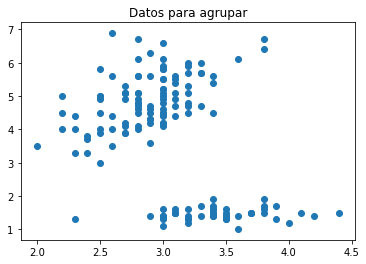

In [66]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
data = load_iris()
X=data.data
Xclustering = X[:,1:3]
plt.scatter(Xclustering[:,0],Xclustering[:,1])
plt.title("Datos para agrupar")
plt.show

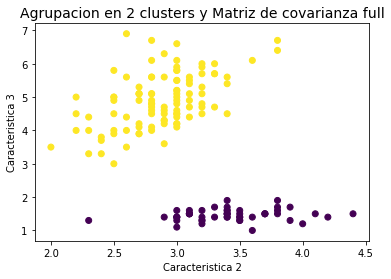

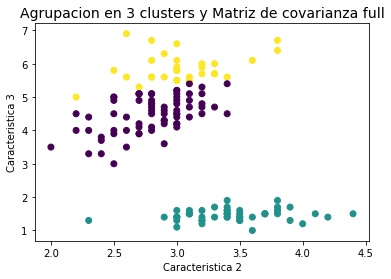

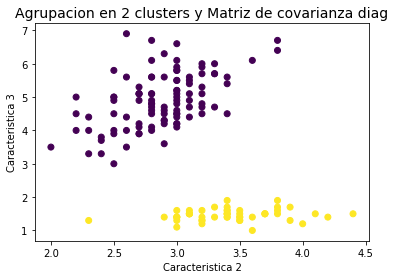

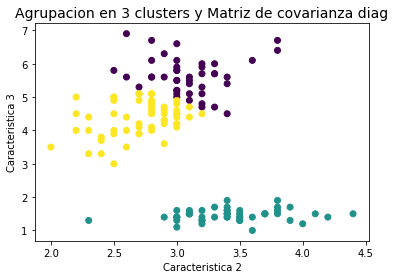

In [86]:
def GMMclustering(Xcluster,M,indexMatrix):
    cov_matrix = ['spherical', 'diag', 'tied', 'full']
    gmm = GaussianMixture(n_components=M, covariance_type=cov_matrix[indexMatrix])
    gmm.fit(Xcluster)
    Y = gmm.predict(Xcluster)
    plt.figure()
    plt.title("Agrupacion en " + str(M) + " clusters y Matriz de covarianza " + str(cov_matrix[indexMatrix]), fontsize=14)
    plt.xlabel('Caracteristica 2')
    plt.ylabel('Caracteristica 3')
    plt.scatter(Xcluster[:,0], Xcluster[:,1], c=Y)

matrix = [(2,3),(3,3),(2,1),(3,1)]

g = [GMMclustering(Xclustering,g,i) for g,i in matrix]
    

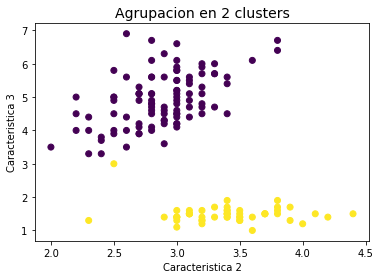

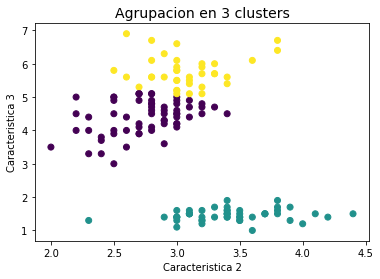

In [87]:
def mainKMeans(M, Xcluster):
    kmeans = KMeans(n_clusters=M, n_init=1)
    kmeans.fit(Xcluster)
    Y = kmeans.predict(Xcluster)
    plt.figure()
    plt.title('Agrupacion en %d clusters' % M, fontsize=14)
    plt.xlabel('Caracteristica 2')
    plt.ylabel('Caracteristica 3')
    plt.scatter(Xcluster[:,0], Xcluster[:,1], c=Y)


k = [mainKMeans(i,Xclustering) for i in range(2,4)]